A potential business problem that could be answered via this project from my machine learning class: can we use ML to estimate the compressive strength of untested combinations of concrete components? 

In [197]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [198]:
# get the data

concrete_dataframe = pd.read_csv("https://raw.githubusercontent.com/alexander-one/portfolio/main/Project%20-%20Concrete%20Strength%20ML/assets/Concrete_Data.csv")

This data is already clean: it has only numerical values, below we check for absent values and drop them (though we could replace them with the mean of each row). Other things I would check data for: changing categorical to numerical using encoders or at the very least dummy variables and check for repeated rows. 

In [199]:
# clean data (this data is already mostly clean, just making sure no values are absent anywhere)
concrete_dataframe.dropna()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


From the ReadMe with the data: 

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [200]:
# make sure it loaded
concrete_dataframe.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [201]:
# here we can see some useful information about each column
concrete_dataframe.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [202]:
#looking to make sure the datatypes are all non-categorical
concrete_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [203]:
from sklearn.model_selection import train_test_split

In [204]:
# split the data into train and test
train_set, test_set = train_test_split(concrete_dataframe, test_size = 0.2, random_state = 42)

In [205]:
# data exploration without messing with the original train_set
concrete = train_set.copy()

In [206]:
#Pearson's r
corr_matrix = concrete.corr()

# remove redundancy in the heatmap about to come up
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

<AxesSubplot:>

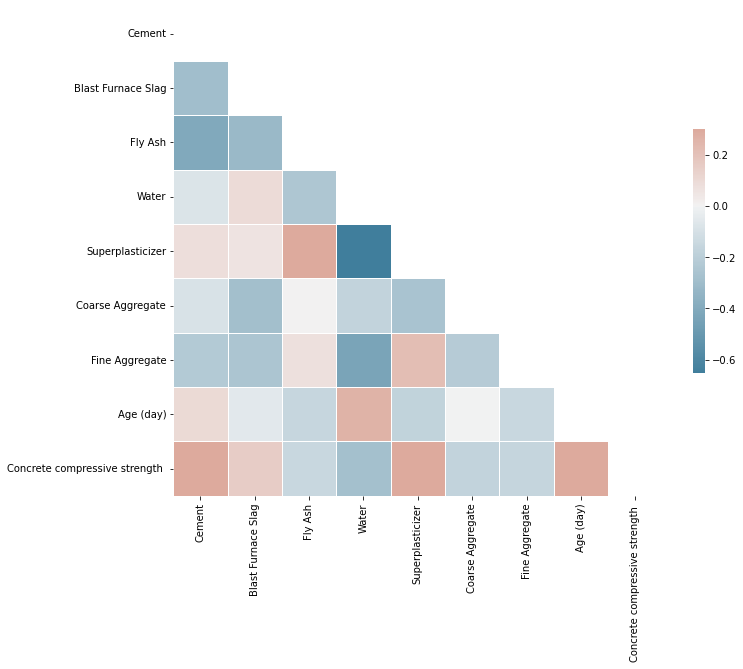

In [207]:
#produce a visual of the correlation between features
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [208]:
corr_matrix["Concrete compressive strength "].sort_values(ascending = False)

Concrete compressive strength     1.000000
Cement                            0.496686
Superplasticizer                  0.353292
Age (day)                         0.332074
Blast Furnace Slag                0.155159
Fly Ash                          -0.149749
Fine Aggregate                   -0.158425
Coarse Aggregate                 -0.171612
Water                            -0.284590
Name: Concrete compressive strength , dtype: float64

Let's take superplasticizer, age, water, fine aggregate, and compressive strength and see what the trends are. 

In [209]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Cement', ylabel='Cement'>,
        <AxesSubplot:xlabel='Blast Furnace Slag', ylabel='Cement'>,
        <AxesSubplot:xlabel='Fly Ash', ylabel='Cement'>,
        <AxesSubplot:xlabel='Water', ylabel='Cement'>,
        <AxesSubplot:xlabel='Superplasticizer', ylabel='Cement'>,
        <AxesSubplot:xlabel='Coarse Aggregate', ylabel='Cement'>,
        <AxesSubplot:xlabel='Fine Aggregate', ylabel='Cement'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Cement'>,
        <AxesSubplot:xlabel='Concrete compressive strength ', ylabel='Cement'>],
       [<AxesSubplot:xlabel='Cement', ylabel='Blast Furnace Slag'>,
        <AxesSubplot:xlabel='Blast Furnace Slag', ylabel='Blast Furnace Slag'>,
        <AxesSubplot:xlabel='Fly Ash', ylabel='Blast Furnace Slag'>,
        <AxesSubplot:xlabel='Water', ylabel='Blast Furnace Slag'>,
        <AxesSubplot:xlabel='Superplasticizer', ylabel='Blast Furnace Slag'>,
        <AxesSubplot:xlabel='Coarse Aggregate', ylabel='Blast Furn

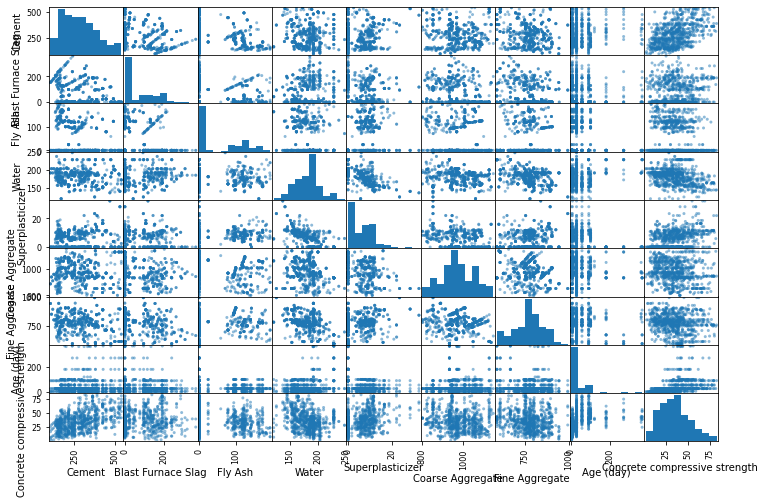

In [210]:
scatter_matrix(concrete, figsize = (12,8))

The above pair plot, with all the pairs available in the dataframe, is actually quite useless in the grand scheme of things. We already identified the features that correlate most with compressive strength, and let's do a pair plot of those. 

array([[<AxesSubplot:xlabel='Superplasticizer', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Cement', ylabel='Superplasticizer'>,
        <AxesSubplot:xlabel='Concrete compressive strength ', ylabel='Superplasticizer'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Cement', ylabel='Age (day)'>,
        <AxesSubplot:xlabel='Concrete compressive strength ', ylabel='Age (day)'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Cement'>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Cement'>,
        <AxesSubplot:xlabel='Cement', ylabel='Cement'>,
        <AxesSubplot:xlabel='Concrete compressive strength ', ylabel='Cement'>],
       [<AxesSubplot:xlabel='Superplasticizer', ylabel='Concrete compressive strength '>,
        <AxesSubplot:xlabel='Age (day)', ylabel='Concrete compressive st

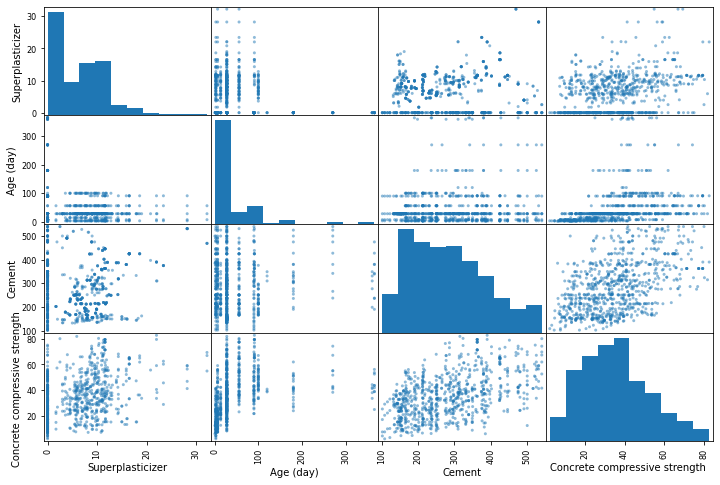

In [211]:
attributes = ["Superplasticizer", "Age (day)", "Cement", "Concrete compressive strength "]
scatter_matrix(concrete[attributes], figsize = (12,8))

From here on we'll use a dataframe with the following features:

Concrete compressive strength, 
Cement, 
Superplasticizer, 
Age (day)

In [212]:
# split the labels from the features
concrete = train_set.drop("Concrete compressive strength ", axis = 1)
concrete_labels = train_set["Concrete compressive strength "].copy()

In [213]:
concrete = concrete.drop("Blast Furnace Slag",  axis = 1)
concrete = concrete.drop("Fly Ash", axis = 1)
concrete = concrete.drop("Water", axis = 1)
concrete = concrete.drop("Coarse Aggregate", axis = 1)
concrete = concrete.drop("Fine Aggregate", axis = 1)

In [214]:
# for feature scaling
from sklearn.preprocessing import StandardScaler

In [215]:
# standardize
scaled_concrete = preprocessing.StandardScaler().fit(concrete)
concrete_prepared = scaled_concrete.transform(concrete)

In [216]:
# train the model
from sklearn.linear_model import LinearRegression

In [217]:
lr = LinearRegression()
lr.fit(concrete_prepared, concrete_labels)

LinearRegression()

In [218]:
# check values for some of the train set to help visualize
show_for_fun = preprocessing.StandardScaler().fit(concrete.iloc[:5])
label_for_fun = concrete_labels.iloc[:5]
prepared_for_fun = show_for_fun.transform(concrete.iloc[:5])

In [219]:
print("Predictions:", lr.predict(prepared_for_fun))
print("Labels: ", list(label_for_fun))

Predictions: [45.29348304 48.56210318 28.50959313 34.15729439 22.76684665]
Labels:  [27.68, 62.05, 23.8, 33.4, 7.4]


These values are looking about like what they should but several of them are off by 32%! Let's take a look at the Root Mean Square Error, the RMSE:

In [220]:
from sklearn.metrics import mean_squared_error

In [221]:
concrete_predictions = lr.predict(concrete_prepared)
lr_mse = mean_squared_error(concrete_labels, concrete_predictions, squared = False)
print("RMSE: ", lr_mse)

RMSE:  12.27315958635994


Compressive strength is in Megapascals, which is equal to 145 pounds per quare inch (psi) per Megapascal. Having an error of around 1800 lbs psi is substantial. Let's try a different model to see how we do with RMSE.

In [222]:
from sklearn.ensemble import RandomForestRegressor

"A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting." - From scikit-learn's page on random forest. 

In [ ]:
# To-Do: 
# Create the random forest regressor model
# Use the grid to check for best hyperparameters to increase efficiency
# Validate models